In [2]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

sns.set()

In [3]:
#Loding the DataSet
car=pd.read_csv('cleaned_car_data.csv')
car2=pd.read_csv('Car_Raw_Dataset.csv')
car['Model']=car2['Model']
car.to_csv('cleaned_car_data_with_model.csv')
car

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
3845,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,E-Class
3846,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,T4 (Transporter)
3847,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,C-Class
3848,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,Land Cruiser 200


In [4]:
#Creating Dictionaries for every Categirical Column
brand_dic=dict()
body_dic=dict()
enginetype_dic=dict()
registration_dic=dict()
model_dic=dict()

In [5]:
#Creating Encoding Column for Categorical Column only
from sklearn.preprocessing import LabelEncoder

#Creating an Instance of the LabelEncoder
le=LabelEncoder()

#Brand
car['Brand_enc']=le.fit_transform(car['Brand'])
for num,lbl in enumerate(le.classes_):
    brand_dic[lbl]=num
print('Brand Updated')

#Body
car['Body_enc']=le.fit_transform(car['Body'])
for num,lbl in enumerate(le.classes_):
    body_dic[lbl]=num
print('Body Updated')

#Engine Type
car['EngineType_enc']=le.fit_transform(car['Engine Type'])
for num,lbl in enumerate(le.classes_):
    enginetype_dic[lbl]=num
print('Engine Type Updated')

#Registration
car['Registration_enc']=le.fit_transform(car['Registration'])
for num,lbl in enumerate(le.classes_):
    registration_dic[lbl]=num
print('Registration Updated')

#Model
car['Model_enc']=le.fit_transform(car['Model'])
for num,lbl in enumerate(le.classes_):
    model_dic[lbl]=num
print('Model Updated')

car_enc=car.drop(['Brand','Body','Engine Type','Registration','Model'],axis=1)
car_enc

Brand Updated
Body Updated
Engine Type Updated
Registration Updated
Model Updated


,Price,Mileage,EngineV,Year,Brand_enc,Body_enc,EngineType_enc,Registration_enc,Model_enc
0,4200.0,277,2.0,1991,1,3,3,1,17
1,7900.0,427,2.9,1999,2,5,0,1,260
2,13300.0,358,5.0,2003,2,3,1,1,233
3,23000.0,240,4.2,2007,0,0,3,1,220
4,18300.0,120,2.0,2011,5,0,3,1,223
...,...,...,...,...,...,...,...,...,...
3845,11500.0,163,2.5,2008,6,5,0,1,116
3846,17900.0,35,1.6,2014,5,3,3,1,272
3847,125000.0,9,3.0,2014,2,3,0,1,80
3848,6500.0,1,3.5,1999,1,3,3,1,172


In [6]:
#Declaring Feature & Target Variables
x=car_enc.drop('Price',axis=1)
y=car_enc['Price']

x.shape,y.shape

((3850, 8), (3850,))

In [7]:
#Splitting the DataSet into Training & Testing Sets
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((3080, 8), (770, 8), (3080,), (770,))

In [8]:
#Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Creating an Instance of RandomForestRegressor
rf_reg=RandomForestRegressor()

#Checking the HyperParameters of RandomForestRegressor
rf_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [9]:
#Fitting the Training Data
rf_reg.fit(xtrain,ytrain)

RandomForestRegressor()

In [10]:
#Predicting on Training Data
y_pred_train=rf_reg.predict(xtrain)

#Importing r2_score & mean_squared_error from Sklearn Library
from sklearn.metrics import r2_score,mean_squared_error

#Calculating r2_score on Training Data
accuracy=r2_score(ytrain,y_pred_train)

#Printing r2_score
print('r2_score on Training Data:',accuracy)

#Calculating mean_squared_error on Training Data
mse=np.sqrt(mean_squared_error(ytrain,y_pred_train))

#Printing rmse
print('rmse on Training Data:',mse)

r2_score on Training Data: 0.9875819017498129
rmse on Training Data: 2130.8149838645645


In [11]:
#Predicting on Testing Data
y_pred_test=rf_reg.predict(xtest)

#Importing r2_score & mean_squared_error from Sklearn Library
from sklearn.metrics import r2_score,mean_squared_error

#Calculating r2_score on Testing Data
accuracy=r2_score(ytest,y_pred_test)

#Printing r2_score
print('r2_score on Testing Data:',accuracy)

#Calculating mean_squared_error on Testing Data
mse=np.sqrt(mean_squared_error(ytest,y_pred_test))

#Printing rmse
print('rmse on Testing Data:',mse)

r2_score on Testing Data: 0.9202983044039181
rmse on Testing Data: 5227.121419316172


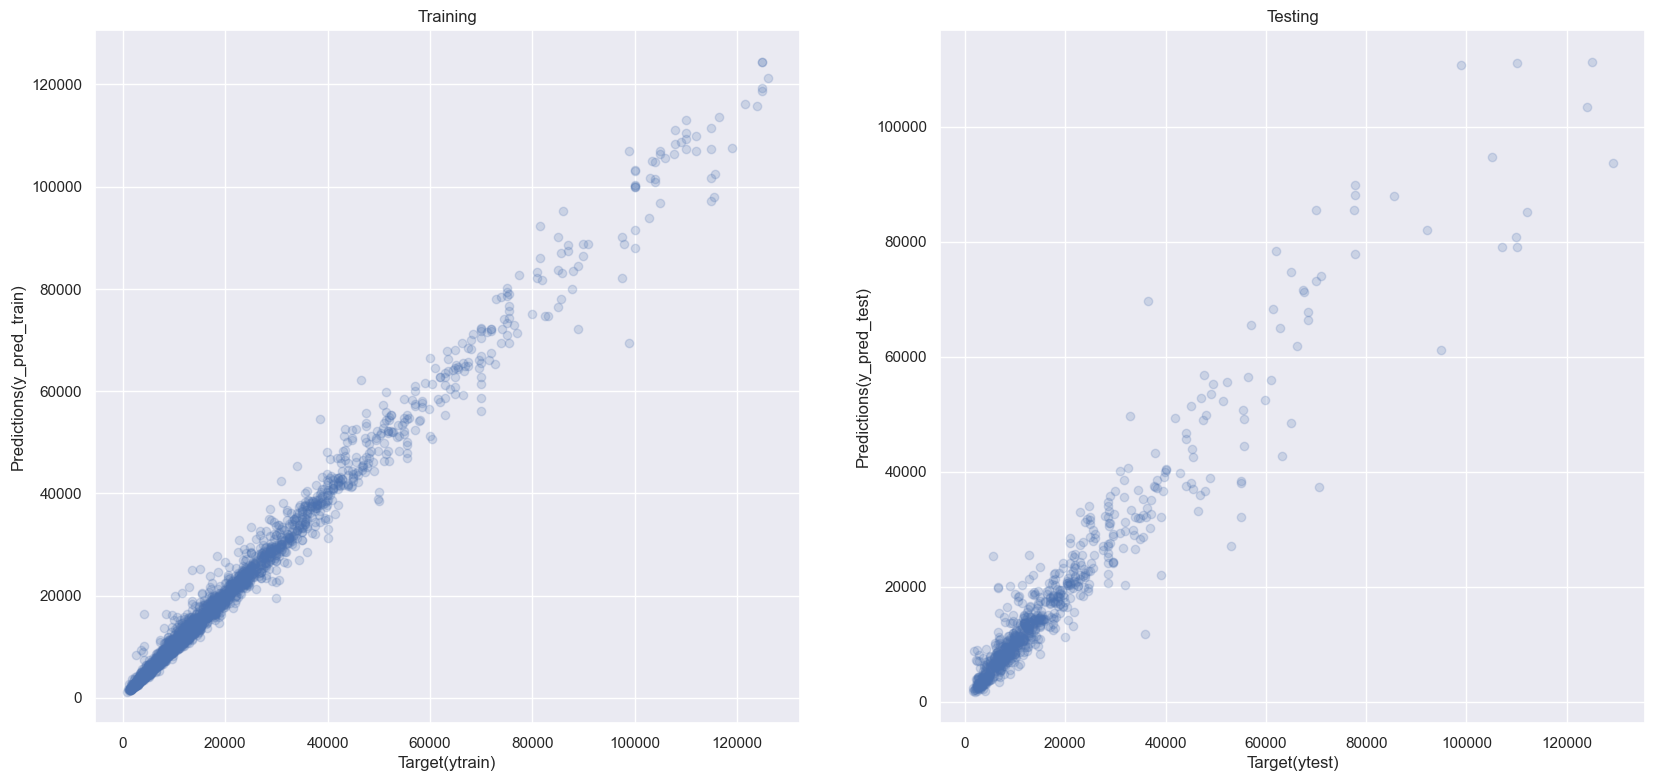

In [12]:
#Plotting the Training
plt.figure(figsize=(20,9))

plt.subplot(1,2,1)
plt.scatter(ytrain,y_pred_train,alpha=0.2)
plt.xlabel('Target(ytrain)')
plt.ylabel('Predictions(y_pred_train)')
plt.title('Training')

plt.subplot(1,2,2)
plt.scatter(ytest,y_pred_test,alpha=0.2)
plt.xlabel('Target(ytest)')
plt.ylabel('Predictions(y_pred_test)')
plt.title('Testing')

plt.show()

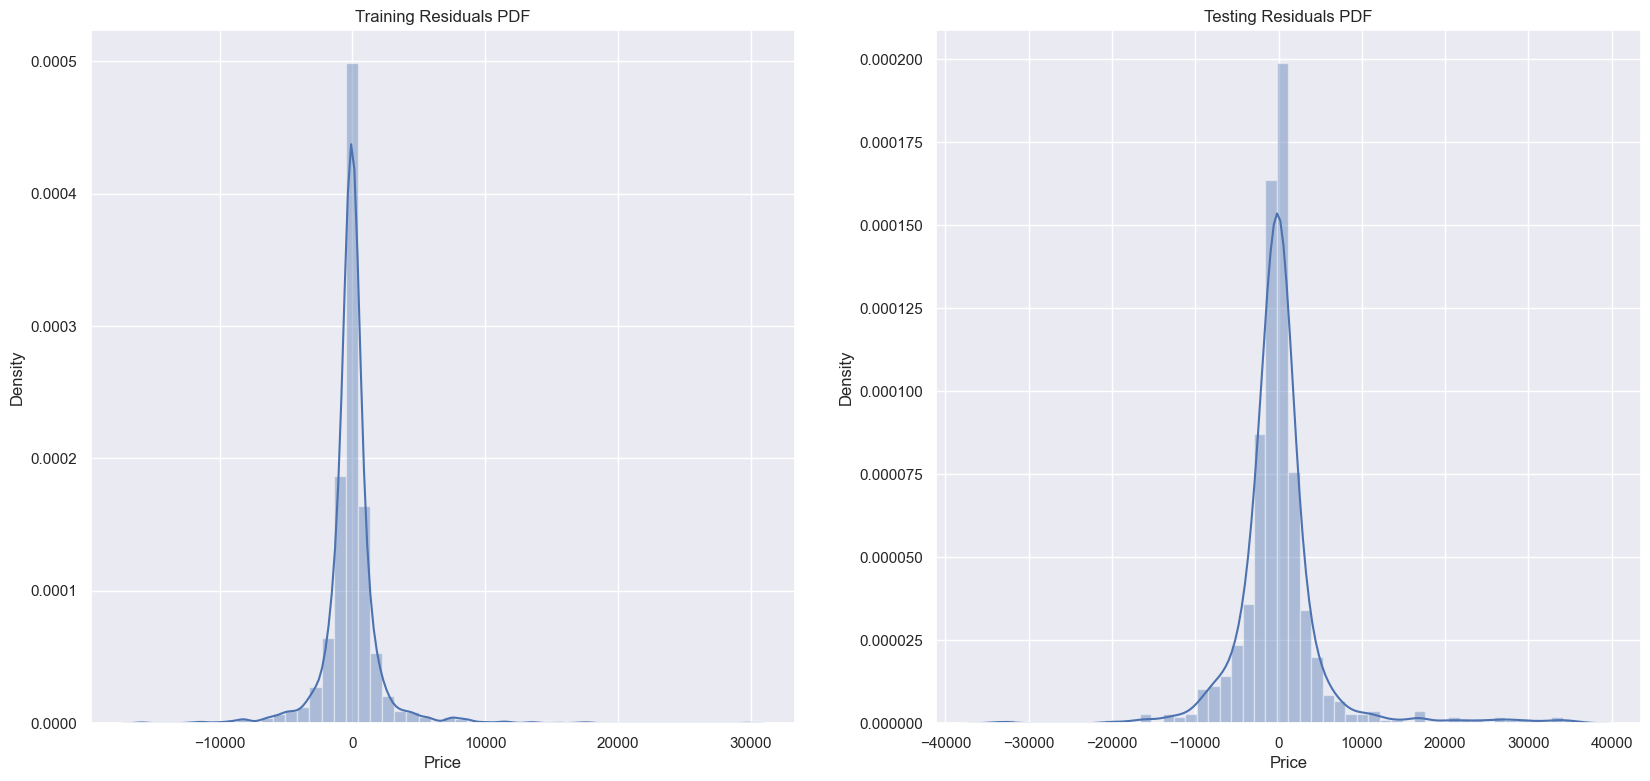

In [13]:
#Plotting the Distribution of Residuals
residuals_train=ytrain-y_pred_train
residuals_test=ytest-y_pred_test

plt.figure(figsize=(20,9))

plt.subplot(1,2,1)
sns.distplot(residuals_train)
plt.title('Training Residuals PDF')

plt.subplot(1,2,2)
sns.distplot(residuals_test)
plt.title('Testing Residuals PDF')

plt.show()

In [14]:
#Creating a DataFrame to compare Original and Predicted values
df=pd.DataFrame(y_pred_test,columns=['Predicted'])
ytest=ytest.reset_index(drop=True)
df['Target']=ytest
df['Residual']=df['Target']-df['Predicted']
df['Difference%']=np.absolute(df['Residual']/df['Target']*100)
df

,Predicted,Target,Residual,Difference%
0,20494.6500,24750.0,4255.3500,17.193333
1,10430.5845,10700.0,269.4155,2.517902
2,4123.2100,3200.0,-923.2100,28.850313
3,8521.2500,9900.0,1378.7500,13.926768
4,5864.5000,6000.0,135.5000,2.258333
...,...,...,...,...
765,5687.4800,4800.0,-887.4800,18.489167
766,13179.6700,14900.0,1720.3300,11.545839
767,10268.9000,8300.0,-1968.9000,23.721687
768,17502.9500,17800.0,297.0500,1.668820


In [15]:
df.describe(include='all')

,Predicted,Target,Residual,Difference%
count,770.000000,770.000000,770.000000,770.000000
mean,17500.600329,17498.166299,-2.434030,20.091130
std,17138.030169,18527.251657,5230.518397,31.793146
min,1741.860000,1500.000000,-33133.565000,0.044545
25%,7292.692500,6799.250000,-1708.755000,5.290813
50%,12035.740000,11550.000000,-170.840000,12.503677
75%,20606.230000,20974.250000,1025.932500,23.262321
max,111280.370000,129222.000000,35477.050000,393.912778


In [16]:
#Performing Hyperparameter Tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Creating an Instance of RandomForestRegressor
rf_reg=RandomForestRegressor()

#Creating Random Parameter
param_dist={'bootstrap':[True,False],
       'max_depth':[10,20,30,40,50,None],#Max No.of Levels in each Decision Tree
       'max_features':['auto','sqrt'],
        'min_samples_leaf':[1,2,4],
        'min_samples_split':[2,5,7],
        'n_estimators':[100,200]#How many Decision Trees
       }

#Creating an Instance of RandomSearchCV
rs_cv=RandomizedSearchCV(estimator=rf_reg,
                          param_distributions=param_dist,
                          n_iter=100,
                          cv=3,
                          verbose=8,
                          n_jobs=-1)

rs_cv.fit(xtrain,ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 200]},
                   verbose=8)

In [17]:
rs_cv.best_estimator_,rs_cv.best_params_,rs_cv.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                       n_estimators=200),
 {'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 40,
  'bootstrap': False},
 0.9137216739028226)

In [18]:
from sklearn.metrics import mean_squared_error as mse

#Checking the Training Error
np.sqrt(mse(ytrain,rs_cv.predict(xtrain)))

165.70497485458438

In [19]:
#Checking the Testing Error
np.sqrt(mse(ytest,rs_cv.predict(xtest)))

5400.563097321986

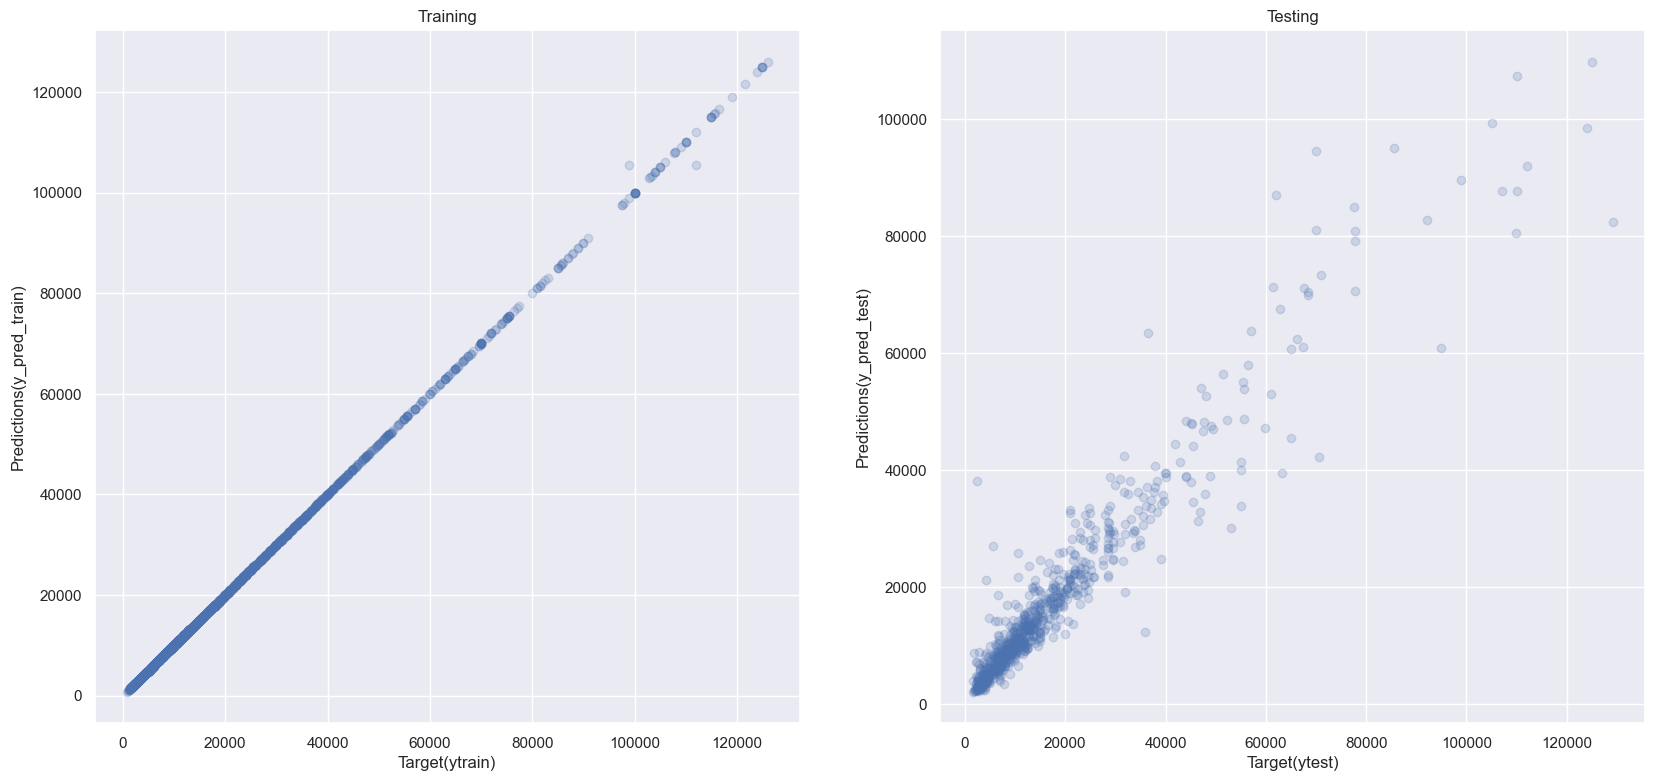

In [20]:
#Plotting the Training
plt.figure(figsize=(20,9))

plt.subplot(1,2,1)
plt.scatter(ytrain,rs_cv.predict(xtrain),alpha=0.2)
plt.xlabel('Target(ytrain)')
plt.ylabel('Predictions(y_pred_train)')
plt.title('Training')

plt.subplot(1,2,2)
plt.scatter(ytest,rs_cv.predict(xtest),alpha=0.2)
plt.xlabel('Target(ytest)')
plt.ylabel('Predictions(y_pred_test)')
plt.title('Testing')

plt.show()

In [21]:
#Importing r2_score from Sklearn Library
from sklearn.metrics import r2_score

#Calculating r2_score on Training Data with randomizedsearchcv
accuracy=r2_score(ytrain,rs_cv.predict(xtrain))

#Printing r2_score
print('r2_score on Training Data:',accuracy)

#Calculating r2_score on Testing Data with randomizedsearchcv
accuracy=r2_score(ytest,rs_cv.predict(xtest))

#Printing r2_score
print('r2_score on Testing Data:',accuracy)

r2_score on Training Data: 0.9999249009052936
r2_score on Testing Data: 0.9149213728935595


In [22]:
#Performing Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

#Creating an Instance of RandomForestRegressor
rf_reg=RandomForestRegressor()

#Creating Random Parameter
param_dist={'bootstrap':[True],
       'max_depth':[25,30,35],#Max No.of Levels in each Decision Tree
       'max_features':['sqrt'],
        'min_samples_leaf':[1,2],
        'min_samples_split':[1,2,3],
        'n_estimators':[100,150,200]#How many Decision Trees
       }

#Creating an Instance of RandomSearchCV
gs_cv=GridSearchCV(estimator=rf_reg,
                          param_grid=param_dist,
                          cv=3,
                          verbose=8,
                          n_jobs=-1)

gs_cv.fit(xtrain,ytrain)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [25, 30, 35],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 150, 200]},
             verbose=8)

In [23]:
gs_cv.best_estimator_,gs_cv.best_params_,gs_cv.best_score_

(RandomForestRegressor(max_depth=35, max_features='sqrt', n_estimators=150),
 {'bootstrap': True,
  'max_depth': 35,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 150},
 0.9118417496290975)

In [24]:
from sklearn.metrics import mean_squared_error as mse

#Checking the Training Error
np.sqrt(mse(ytrain,gs_cv.predict(xtrain)))

2068.8765490165297

In [25]:
#Checking the Testing Error
np.sqrt(mse(ytest,gs_cv.predict(xtest)))

5677.077155228759

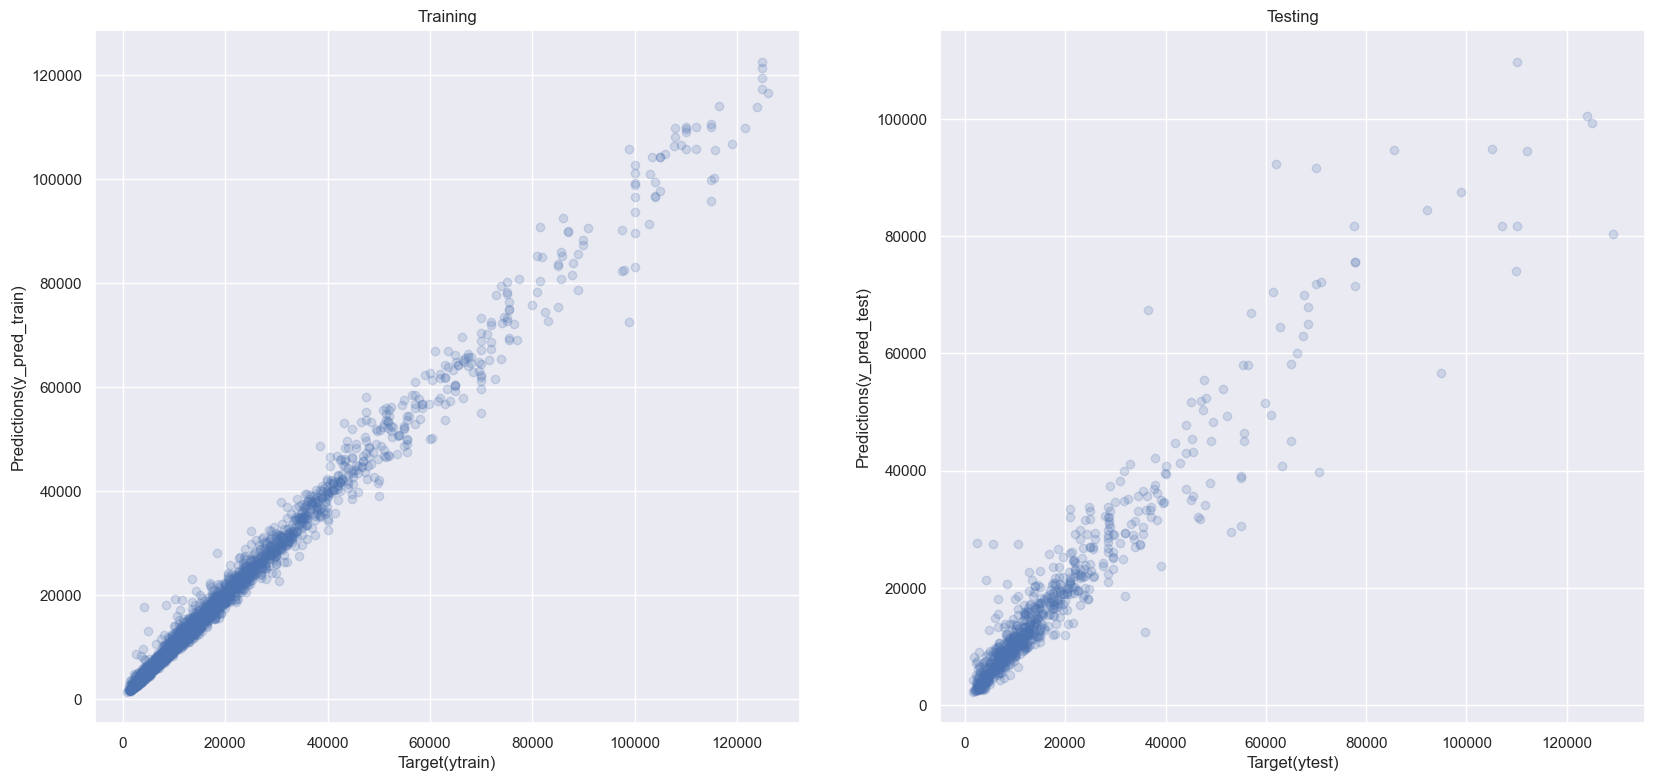

In [26]:
#Plotting the Training
plt.figure(figsize=(20,9))

plt.subplot(1,2,1)
plt.scatter(ytrain,gs_cv.predict(xtrain),alpha=0.2)
plt.xlabel('Target(ytrain)')
plt.ylabel('Predictions(y_pred_train)')
plt.title('Training')

plt.subplot(1,2,2)
plt.scatter(ytest,gs_cv.predict(xtest),alpha=0.2)
plt.xlabel('Target(ytest)')
plt.ylabel('Predictions(y_pred_test)')
plt.title('Testing')

plt.show()

In [27]:
#Calculating r2_score on Training Data with gridsearchcv
accuracy=r2_score(ytrain,gs_cv.predict(xtrain))

#Printing r2_score
print('r2_score on Training Data:',accuracy)

#Calculating r2_score on Testing Data with gridsearchcv
accuracy=r2_score(ytest,gs_cv.predict(xtest))

#Printing r2_score
print('r2_score on Testing Data:',accuracy)

r2_score on Training Data: 0.9882933465783843
r2_score on Testing Data: 0.9059861198300005


In [28]:
#Creating a DataFrame to compare Original and Predicted values
df=pd.DataFrame(rs_cv.predict(xtest),columns=['Predicted'])
df['Target']=ytest
df

,Predicted,Target
0,20975.44500,24750.0
1,10908.58450,10700.0
2,4281.84000,3200.0
3,9336.97000,9900.0
4,5965.71500,6000.0
...,...,...
765,14843.14675,4800.0
766,12866.68500,14900.0
767,10522.02000,8300.0
768,16414.56500,17800.0


In [29]:
df['Residual']=df['Target']-df['Predicted']
df['Difference%']=np.absolute(df['Residual']/df['Target']*100)
df

,Predicted,Target,Residual,Difference%
0,20975.44500,24750.0,3774.55500,15.250727
1,10908.58450,10700.0,-208.58450,1.949388
2,4281.84000,3200.0,-1081.84000,33.807500
3,9336.97000,9900.0,563.03000,5.687172
4,5965.71500,6000.0,34.28500,0.571417
...,...,...,...,...
765,14843.14675,4800.0,-10043.14675,209.232224
766,12866.68500,14900.0,2033.31500,13.646409
767,10522.02000,8300.0,-2222.02000,26.771325
768,16414.56500,17800.0,1385.43500,7.783343


In [30]:
df.describe(include='all')

,Predicted,Target,Residual,Difference%
count,770.000000,770.000000,770.000000,770.000000
mean,17633.821098,17498.166299,-135.654799,23.351852
std,16851.897106,18527.251657,5402.368268,63.905204
min,2176.380000,1500.000000,-35823.730000,0.003258
25%,7692.752500,6799.250000,-1784.277500,5.270445
50%,12205.824800,11550.000000,-323.457500,12.316251
75%,21260.360000,20974.250000,1044.653750,24.189033
max,109867.065000,129222.000000,46820.707900,1492.655417


In [31]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rs_cv, file)